In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from orbit.utils.simulation import make_trend, make_seasonality, make_regression

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [8, 8]

%matplotlib inline

import pandas as pd
import random
random.seed()

xs = pd.date_range("00:00", "23:59", freq="1min")
xs

DatetimeIndex(['2021-07-26 00:00:00', '2021-07-26 00:01:00',
               '2021-07-26 00:02:00', '2021-07-26 00:03:00',
               '2021-07-26 00:04:00', '2021-07-26 00:05:00',
               '2021-07-26 00:06:00', '2021-07-26 00:07:00',
               '2021-07-26 00:08:00', '2021-07-26 00:09:00',
               ...
               '2021-07-26 23:50:00', '2021-07-26 23:51:00',
               '2021-07-26 23:52:00', '2021-07-26 23:53:00',
               '2021-07-26 23:54:00', '2021-07-26 23:55:00',
               '2021-07-26 23:56:00', '2021-07-26 23:57:00',
               '2021-07-26 23:58:00', '2021-07-26 23:59:00'],
              dtype='datetime64[ns]', length=1440, freq='T')

### Random Walk

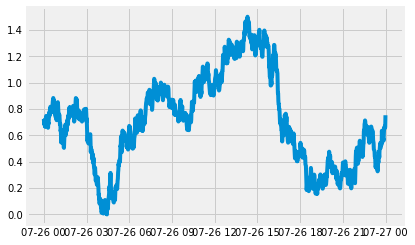

In [8]:
rw = make_trend(len(xs), rw_loc=0.01, rw_scale=1, seed=random.randint(1, 2000))
# normalize [0, 1.5]
rw= (1.5*(rw - np.min(rw))/np.ptp(rw))
_ = plt.plot(xs, rw)

### ARMA

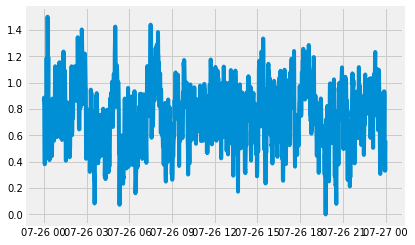

In [6]:
arma_trend =  make_trend(len(xs), method='arma', arma=[.8, -.1], seed=random.randint(1, 2000))
# normalize [0, 1.5]
arma_trend = (1.5*(arma_trend - np.min(arma_trend))/np.ptp(arma_trend))
_ = plt.plot(xs, arma_trend)

## Seasonality

### Discrete

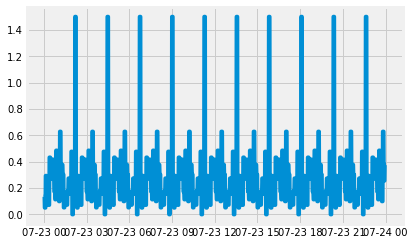

In [17]:
ds = make_seasonality(len(xs), seasonality=random.randint(20, 50), duration=random.randint(2, 50), method='discrete', seed=random.randint(1, 2000))
ds = (1.5*(ds - np.min(ds))/np.ptp(ds))
_ = plt.plot(xs, ds)

### Fourier

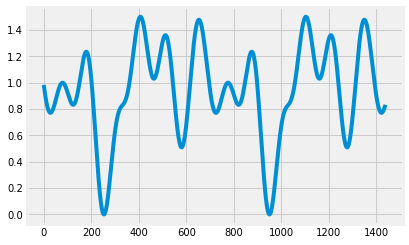

In [21]:
fs = make_seasonality(len(xs), seasonality=random.randint(100, 1000), method='fourier', order=random.randint(4, 10), seed=random.randint(1, 2000))
fs = (1.5*(fs - np.min(fs))/np.ptp(fs))
_ = plt.plot(fs)